## Init

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/srinivasan/Skan/data_science/Kronos_Model/data/64f1dafebdd3ecace22dc98a/kronos_results.csv")

In [3]:
df.head()

,Unnamed: 0,context,skip,data_version,update_version,train_loss,valid_loss,accuracy,mcc,f1-macro,f1-weighted,baccu
0,0,3,0,1,1,2.851134,2.213929,0.17,0.13,0.08,0.08,0.25
1,1,3,0,1,2,2.843994,2.032161,0.50,0.40,0.24,0.38,0.40
2,2,3,0,1,3,3.606372,3.081514,0.17,0.00,0.08,0.20,0.11
3,3,3,0,1,4,2.830794,2.080034,0.33,0.28,0.19,0.19,0.40
4,4,3,0,2,1,2.876821,1.187286,0.67,0.53,0.49,0.71,0.75


In [4]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [50]:
# df.drop(columns = ['accuracy_nn', 'mcc_nn', 'f1-macro_nn', 'f1-weighted_nn', 'baccu_nn'], axis=1, inplace=True)

In [5]:
df

,context,skip,data_version,update_version,train_loss,valid_loss,accuracy,mcc,f1-macro,f1-weighted,baccu
0,3,0,1,1,2.851134,2.213929,0.17,0.13,0.08,0.08,0.25
1,3,0,1,2,2.843994,2.032161,0.50,0.40,0.24,0.38,0.40
2,3,0,1,3,3.606372,3.081514,0.17,0.00,0.08,0.20,0.11
3,3,0,1,4,2.830794,2.080034,0.33,0.28,0.19,0.19,0.40
4,3,0,2,1,2.876821,1.187286,0.67,0.53,0.49,0.71,0.75
...,...,...,...,...,...,...,...,...,...,...,...
403,10,4,2,4,3.230431,2.209796,0.40,0.00,0.19,0.57,0.40
404,10,4,3,1,2.980747,1.234719,0.80,0.72,0.60,0.88,0.83
405,10,4,3,2,3.189462,1.915017,0.60,0.36,0.43,0.68,0.58
406,10,4,3,3,3.147450,1.879956,0.80,0.72,0.60,0.88,0.83


In [52]:
# df.to_csv("/home/srinivasan/Skan/data_science/Kronos_Model/data/64f1dafebdd3ecace22dc98a/kronos_results.csv")

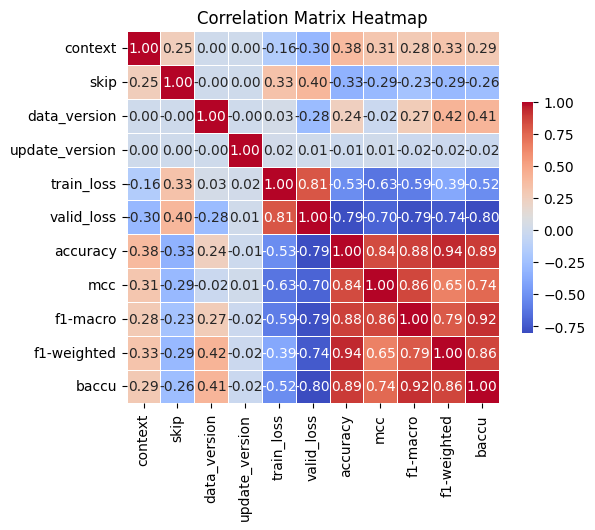

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()

## Effect of Context

In [7]:
summary_stats_context = df.groupby('context').agg({
    'accuracy': ['mean'],
    'train_loss': ['mean'],
    'valid_loss': ['mean'],
    'mcc': ['mean'],
    'f1-macro': ['mean'],
    'f1-weighted': ['mean'],
    'baccu': ['mean']
})

summary_stats_context.columns = ['_'.join(col).strip() for col in summary_stats_context.columns.values]

summary_stats_context.reset_index(inplace=True)

summary_stats_context

,context,accuracy_mean,train_loss_mean,valid_loss_mean,mcc_mean,f1-macro_mean,f1-weighted_mean,baccu_mean
0,3,0.441250,3.223156,2.467024,0.192500,0.232917,0.502917,0.413750
1,4,0.557222,3.148430,2.106713,0.355556,0.346389,0.620833,0.541389
2,5,0.592083,3.148275,2.036258,0.357500,0.348125,0.651042,0.548125
3,6,0.597000,3.144525,2.018888,0.391333,0.356833,0.643333,0.552333
4,7,0.686167,3.098762,1.785059,0.551167,0.449833,0.721000,0.645833
5,8,0.711333,3.086819,1.655131,0.526333,0.487667,0.750000,0.673667
6,9,0.712167,3.052206,1.630559,0.510500,0.435167,0.760000,0.628167
7,10,0.763000,3.041878,1.495239,0.595500,0.487000,0.792833,0.709167


We see increasing context length is increasing the various scores and accuracy. Here all metrics are averaged over other variables.

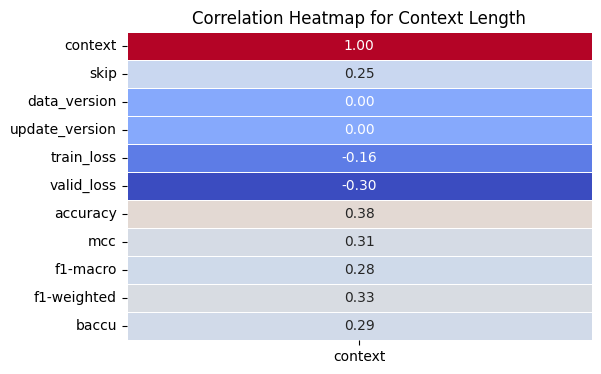

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix[['context']], annot=True, fmt='.2f', cmap='coolwarm', cbar=False, linewidths=.5)
plt.title(f'Correlation Heatmap for Context Length')
plt.show()

## Effect of Skip

In [9]:
summary_stats_skip = df.groupby('skip').agg({
    'accuracy': ['mean'],
    'train_loss': ['mean'],
    'valid_loss': ['mean'],
    'mcc': ['mean'],
    'f1-macro': ['mean'],
    'f1-weighted': ['mean'],
    'baccu': ['mean']
})

summary_stats_skip.columns = ['_'.join(col).strip() for col in summary_stats_skip.columns.values]

summary_stats_skip.reset_index(inplace=True)

summary_stats_skip

,skip,accuracy_mean,train_loss_mean,valid_loss_mean,mcc_mean,f1-macro_mean,f1-weighted_mean,baccu_mean
0,0,0.803333,2.936550,1.192116,0.672708,0.528125,0.835521,0.745521
1,1,0.622708,3.084207,1.880620,0.404271,0.376979,0.674167,0.585104
2,2,0.641310,3.117158,1.892477,0.486786,0.421667,0.681786,0.586786
3,3,0.581667,3.270779,2.284559,0.254306,0.295417,0.638472,0.517222
4,4,0.576667,3.198964,2.157405,0.441333,0.403000,0.625500,0.566833


Higher skip leads to worse results. Once more all metrics averaged over other variables.

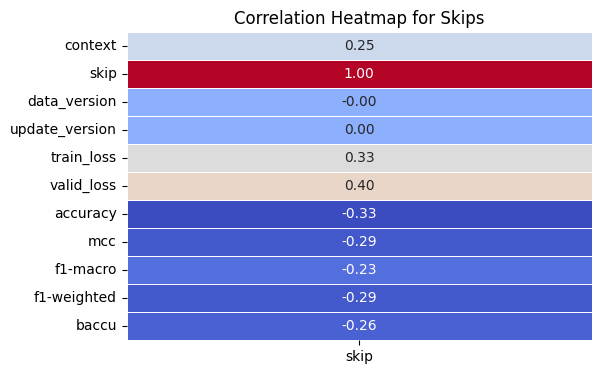

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix[['skip']], annot=True, fmt='.2f', cmap='coolwarm', cbar=False, linewidths=.5)
plt.title(f'Correlation Heatmap for Skips')
plt.show()

## Effect of Data Version

In [11]:
summary_stats_dv = df.groupby('data_version').agg({
    'accuracy': ['mean'],
    'train_loss': ['mean'],
    'valid_loss': ['mean'],
    'mcc': ['mean'],
    'f1-macro': ['mean'],
    'f1-weighted': ['mean'],
    'baccu': ['mean']
})

summary_stats_dv.columns = ['_'.join(col).strip() for col in summary_stats_dv.columns.values]

summary_stats_dv.reset_index(inplace=True)

summary_stats_dv

,data_version,accuracy_mean,train_loss_mean,valid_loss_mean,mcc_mean,f1-macro_mean,f1-weighted_mean,baccu_mean
0,1,0.571103,3.090167,2.213818,0.480956,0.315074,0.546544,0.450882
1,2,0.694118,3.116433,1.644616,0.445441,0.455809,0.776765,0.681397
2,3,0.699853,3.111545,1.640708,0.463824,0.462647,0.777426,0.693309


More informations (data version 3) yields better results.

## Effect of Update Version

In [12]:
summary_stats_uv = df.groupby('update_version').agg({
    'accuracy': ['mean'],
    'train_loss': ['mean'],
    'valid_loss': ['mean'],
    'mcc': ['mean'],
    'f1-macro': ['mean'],
    'f1-weighted': ['mean'],
    'baccu': ['mean']
})

summary_stats_uv.columns = ['_'.join(col).strip() for col in summary_stats_uv.columns.values]

summary_stats_uv.reset_index(inplace=True)

summary_stats_uv

,update_version,accuracy_mean,train_loss_mean,valid_loss_mean,mcc_mean,f1-macro_mean,f1-weighted_mean,baccu_mean
0,1,0.650980,3.099595,1.825837,0.451176,0.411373,0.700000,0.606765
1,2,0.662451,3.108337,1.840843,0.468039,0.416667,0.706961,0.619902
2,3,0.659804,3.093721,1.805219,0.477157,0.417157,0.703922,0.617941
3,4,0.646863,3.122541,1.860289,0.457255,0.399510,0.690098,0.589510


Greedy everyday update and new activity update seem to perform the best ~ the same